# Extract Key-Value pairs from Resume PDF

Below is an example of using AnyParser to accurately extract values from a sample Resume PDF into JSON format.

To load the preview for the PDF document used in this demo, install the Poppler PDF rendering library:
- Mac:
```bash
brew install poppler
```
- Linux:
```bash
sudo apt update
sudo apt install poppler-utils
```
- Windows:
```bash
choco install poppler
```

### 1. Load the libraries

To install the packages, uncomment the commands below.

In [1]:
# !pip3 install python-dotenv
# !pip3 install PyPDF2 pdfplumber pdf2image

Next, to use AnyParser, either install the public package or clone the SDK locally.

In [2]:
# Option 1: install public package
# !pip3 install --upgrade any-parser

# Option 2: if you have sdk respository installed locally, add system path
import sys
sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

After performing Option 1 or 2 above, import the libraries.

In [3]:
import os
from dotenv import load_dotenv
from pdf2image import convert_from_path
from IPython.display import display
from any_parser import AnyParser

### 2. Set up your AnyParser API key

To set up your `CAMBIO_API_KEY` API key, you will:

1. create a `.env` file in your root folder;
2. add the following one line to your `.env file:
    ```
    CAMBIO_API_KEY=17b************************
    ```

Then run the below line to load your API key.

In [4]:
load_dotenv(override=True)
example_apikey = os.getenv("CAMBIO_API_KEY")

### 3. Load the test sample data

Now let's load a sample data to test AnyParser's capabilities. AnyParser supports both image and PDF. 

Let's visualize the sample pdf first!

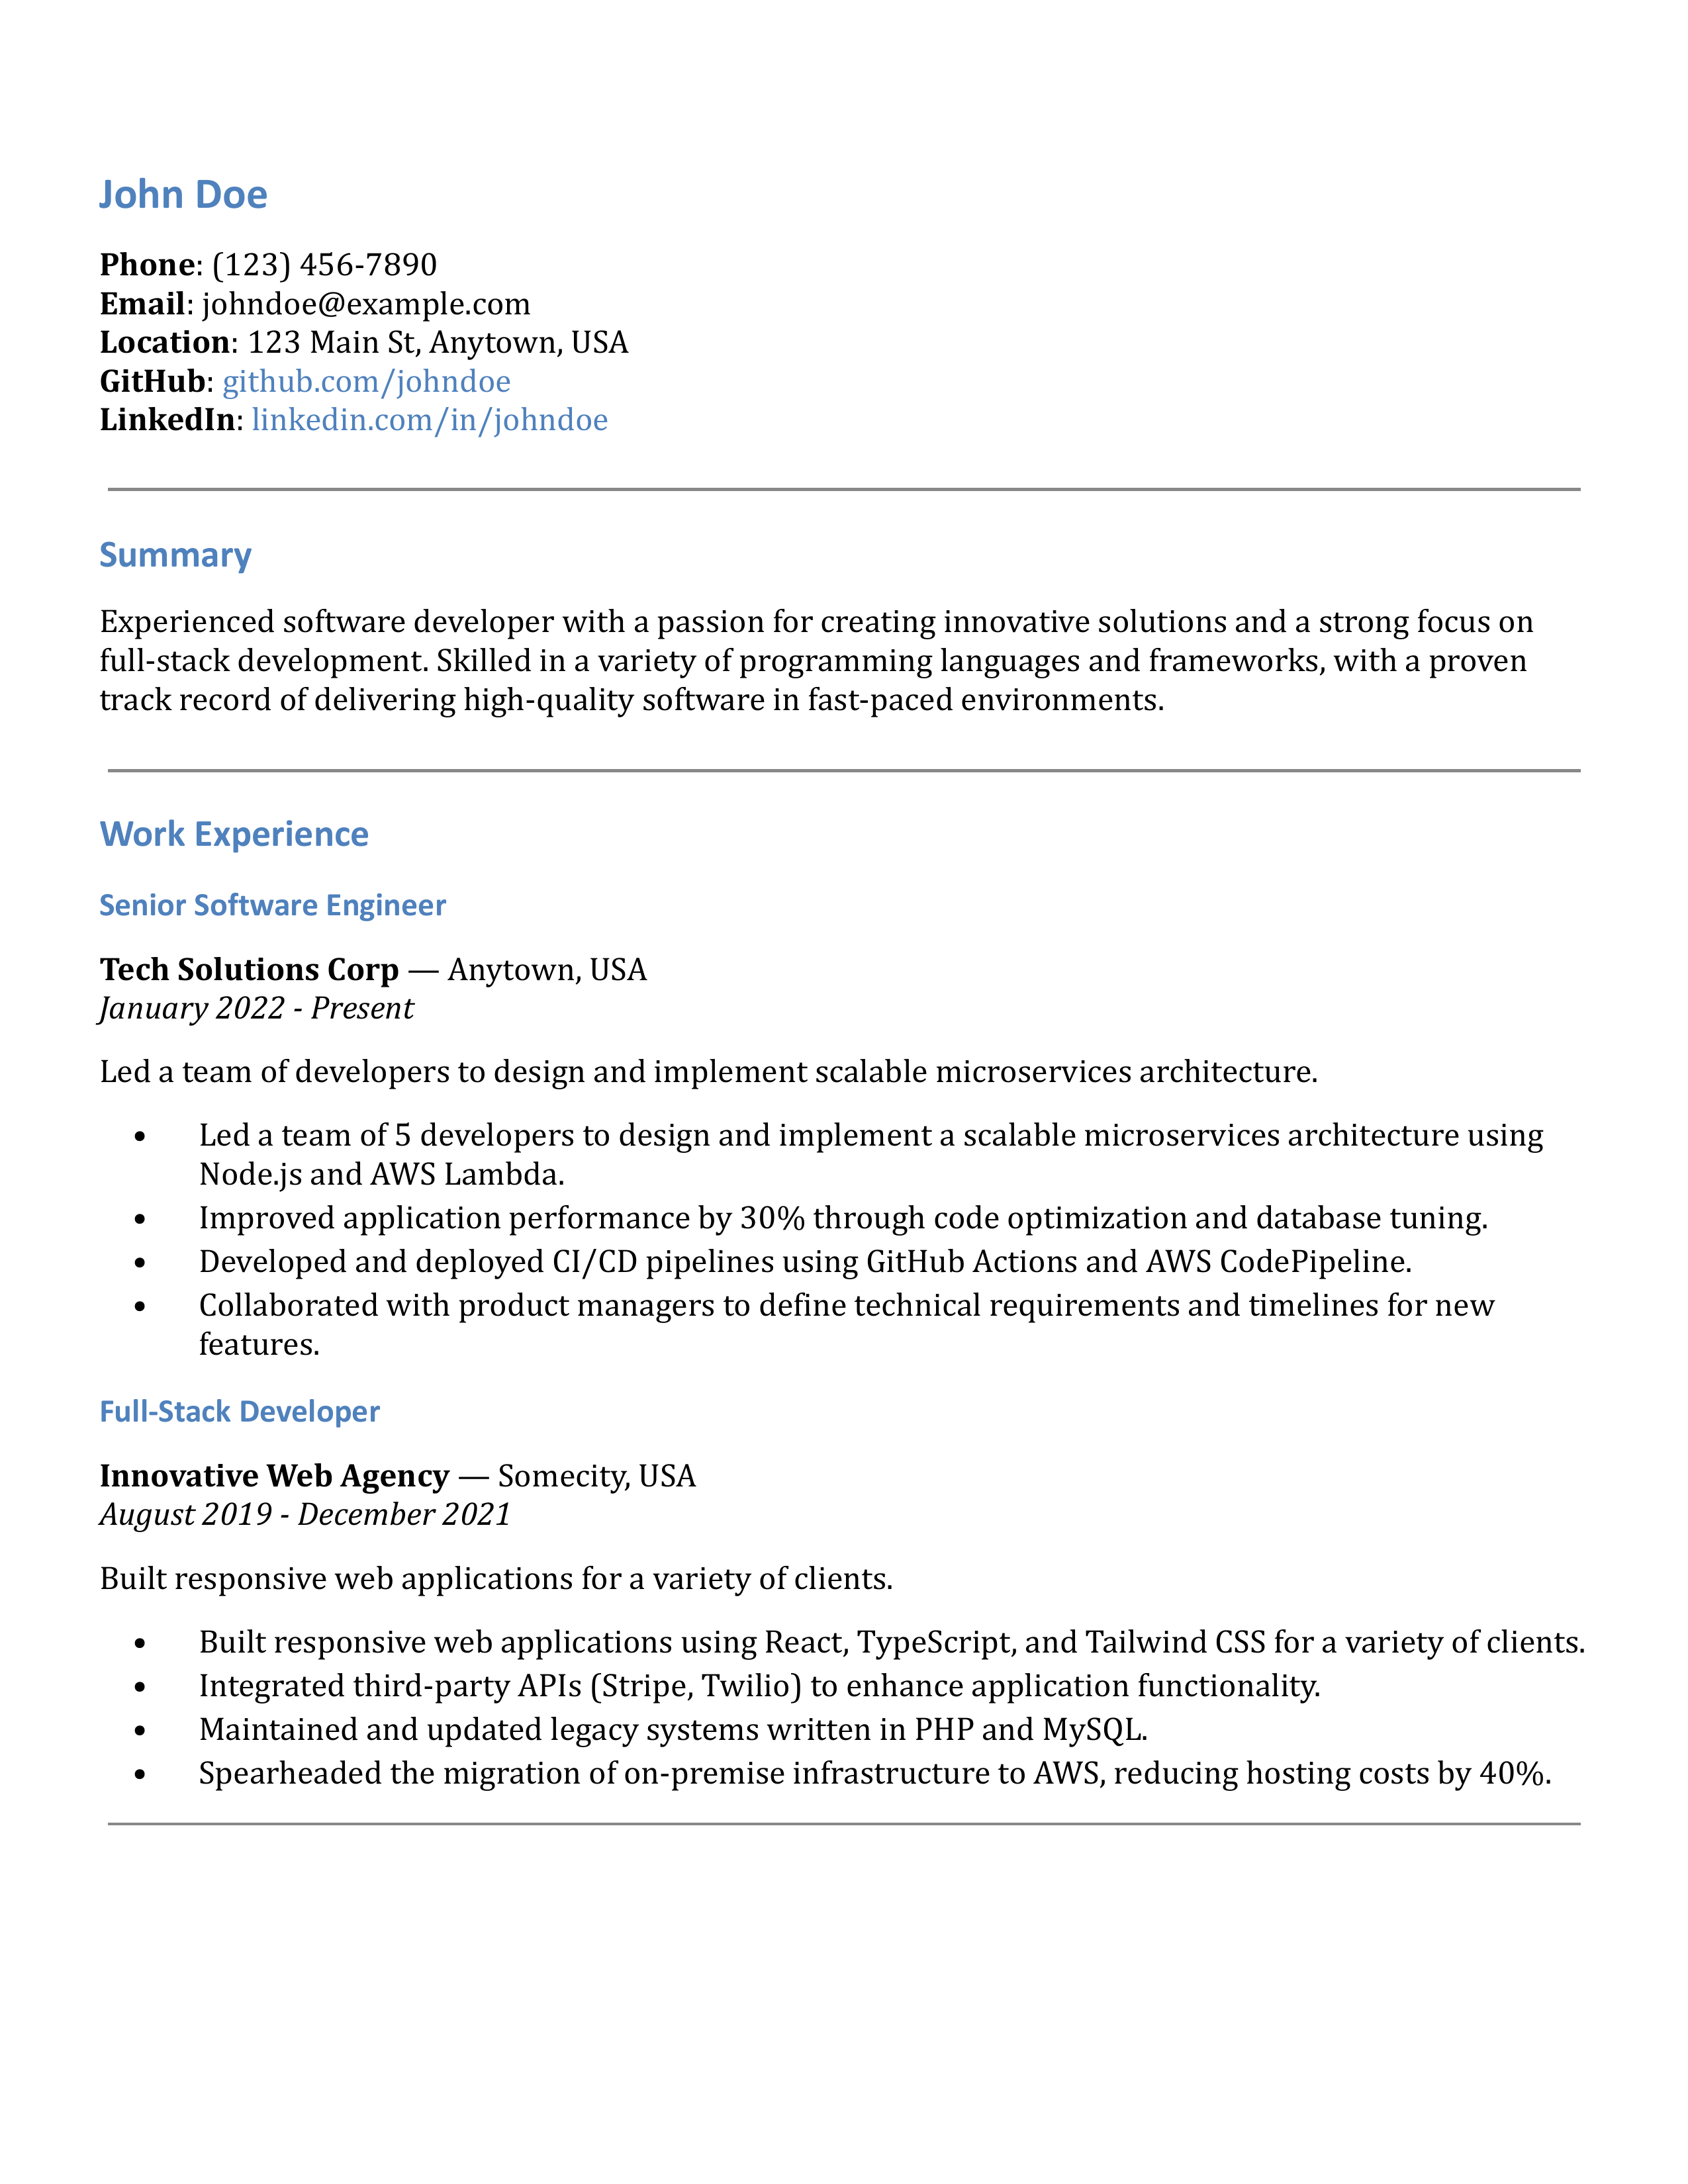

In [5]:
example_local_file = "./sample_data/test_resume.pdf"

# Convert PDF to a list of images
pages = convert_from_path(example_local_file, 300)  # 300 is the DPI

# Display the first page
display(pages[0])

### 4. Run AnyParser and Extract the Key Value pairs

We will run AnyParser on our sample data and then extract the key value pairs. 

We need to specify 2 parameters:
- `file_path`: The path to the PDF file.
- `extract_type`: This specifies the type of information that you want to extract from the resume. It can be one of the following:
    - `personal_info`: Extracts personal information from the resume, such as name, email, phone number, etc.
    - `education`: Extracts educational information from the resume, such as degree, university, graduation year, etc.
    - `work_experience`: Extracts work experience information from the resume, such as company name, job title, start date, end date, etc.
    - `skills`: Extracts skills information from the resume. Categorized into 'Programming Languages', 'Tools', and 'Other'
    - `certifications`: Extracts certifications information from the resume, such as certification name, and certification description.
    - `projects`: Extracts project information from the resume, including project name, dates, and project descriptions.

The extract may take 1-20 seconds per page.

In [6]:
ap = AnyParser(example_apikey)

# extract returns a tuple containing the markdown as a string and total time
resume_extract_result, total_time = ap.resume_extract(example_local_file, extract_type="work_experience")

display(resume_extract_result)
print(total_time)

[{'job_title': 'Senior Software Engineer',
  'company_name': 'Tech Solutions Corp',
  'location': 'Anytown, USA',
  'start_date': '2022-01-01',
  'end_date': 'present',
  'job_type': None,
  'summary': 'Led a team of developers to design and implement scalable microservices architecture.',
  'bullet_points': ['Led a team of 5 developers to design and implement a scalable microservices architecture using Node.js and AWS Lambda.',
   'Improved application performance by 30% through code optimization and database tuning.',
   'Developed and deployed CI/CD pipelines using GitHub Actions and AWS CodePipeline.',
   'Collaborated with product managers to define technical requirements and timelines for new features.']},
 {'job_title': 'Full-Stack Developer',
  'company_name': 'Innovative Web Agency',
  'location': 'Somecity, USA',
  'start_date': '2019-08-01',
  'end_date': '2021-12-31',
  'job_type': None,
  'summary': 'Built responsive web applications for a variety of clients.',
  'bullet_p

Time Elapsed: 13.96 seconds


## End of the notebook

Check more [case studies](https://www.cambioml.com/blog) of CambioML!

<a href="https://www.cambioml.com/" title="Title">
    <img src="./sample_data/cambioml_logo_large.png" style="height: 100px; display: block; margin-left: auto; margin-right: auto;"/>
</a>